# Import the libraries

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Data Analysis



In [90]:
data=pd.read_csv('mushrooms.csv') #read the data from mushroom.csv file

In [91]:
data.head() #show 5 row of the data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [92]:
#basis overview of the data
print(data.describe()) #Here we can see the count, unique values and other information about the data

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [93]:
print('The total number of columns in the data: ',len(data.columns))
print(data.columns)
print('Is there any missing value in the data: ',data.isnull().any())

The total number of columns in the data:  23
Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
Is there any missing value in the data:  class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stal

In [94]:
#see all the unique values in each columns
for col in data:
    print(data[col].unique())

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


Here we can see, there are some '?' values in the data, we need to replace them

In [95]:
print(data.iloc[:,11].value_counts())

print("Name of the column :",data.iloc[:,11].value_counts().name)

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
Name of the column : stalk-root


Hence this column has anourmus amount of missing data if the form of ? mark, we conclude to drop this column

In [96]:
data_refined = data.drop(columns=['stalk-root'],axis=1)
print(data_refined.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [97]:
#split the data into features and target
data_features = data_refined.iloc[:,1:]
data_target = data_refined.iloc[:,0]

In [98]:
print(type(data_features),data.shape)

<class 'pandas.core.frame.DataFrame'> (8124, 23)


#convert the categorical data in numeric data using  OneHotEncoder

In [99]:
from sklearn.preprocessing import OneHotEncoder
data_encoded=pd.get_dummies(data_features,columns=data_features.columns)
le = LabelEncoder()
target_encoded= le.fit_transform(data_target)

In [100]:
print(data_encoded.head())
print(data_encoded.shape)
print(target_encoded)
print(target_encoded.shape)

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0  ...             1             0  

# Train the data using random forest algorithm

In [101]:
#split the data into train and test with 60:40 ratio
x_train,x_test,y_train,y_test=train_test_split(data_encoded,target_encoded,random_state=34,test_size=0.4)

In [105]:
#list of classifiers
classifiers = [
    SVC(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    
]

In [107]:
for classifier in classifiers:
    #fit the classifier on data
    classifier.fit(x_train,y_train)
    #store the prediction in a pred variable
    pred = classifier.predict(x_test)
    print("Accuracy of the :", classifier,accuracy_score(y_test,pred))
    

Accuracy of the : SVC() 1.0
Accuracy of the : LogisticRegression() 0.9990769230769231
Accuracy of the : KNeighborsClassifier() 1.0
Accuracy of the : GaussianNB() 0.9843076923076923
Accuracy of the : DecisionTreeClassifier() 1.0
Accuracy of the : RandomForestClassifier() 1.0


In [108]:
#Here we can see that SVC, decision tree and RandomForest are perfoming better than other algorithms.

In [109]:
#choose the best classifier
clf_best = RandomForestClassifier()
clf_best.fit(x_train,y_train)
pred=clf_best.predict(x_test)
print(pred.shape)

(3250,)


# Evaluate the model using confusion_matix, and accuracy_score

In [112]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(pred,y_test))
print(roc_auc_score(pred,y_test))


[[1640    0]
 [   0 1610]]
1.0
1.0


# We got 100% accuracy on this data using RandomForest Classifier.



In [115]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

In [116]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

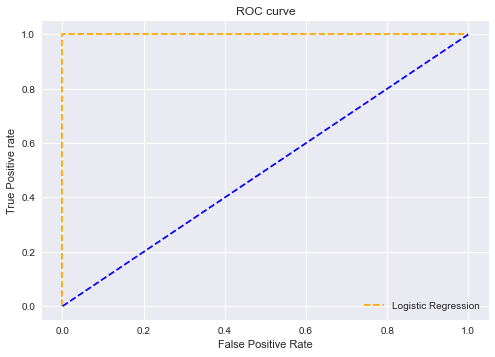

In [117]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();